<a href="https://colab.research.google.com/github/nik-31/Covid-Detection/blob/main/Covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://cb.lk/covid_19

--2021-06-19 17:37:22--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-06-19 17:37:22--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-06-19 17:37:22--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-06

In [2]:
!unzip covid_19


Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
train_path = 'CovidDataset/Train'
test_path = 'CovidDataset/Val'



In [4]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 38kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 450kB 49.0MB/s 
     |████████████████████████████████| 3.8MB 37.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=e0b953dadda86c5d6587d1409ab20e7d8bfbcdc6d623b3ec21fea27f271b271a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing insta

In [7]:

import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [9]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [10]:

train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
covid = model.fit(train_set,
                  validation_data=test_set,
                  epochs=20,
                  steps_per_epoch=len(train_set),
                  validation_steps=len(test_set)
              )

Train for 14 steps, validate for 4 steps
Epoch 1/20
14/14 [==============================] - 66s 5s/step - loss: 0.7674 - accuracy: 0.5714 - val_loss: 0.6882 - val_accuracy: 0.8000
Epoch 2/20
14/14 [==============================] - 65s 5s/step - loss: 0.5955 - accuracy: 0.7143 - val_loss: 0.4986 - val_accuracy: 0.8167
Epoch 3/20
14/14 [==============================] - 65s 5s/step - loss: 0.3309 - accuracy: 0.8884 - val_loss: 0.2216 - val_accuracy: 0.9667
Epoch 4/20
14/14 [==============================] - 65s 5s/step - loss: 0.2863 - accuracy: 0.8616 - val_loss: 0.3148 - val_accuracy: 0.9667
Epoch 5/20
14/14 [==============================] - 64s 5s/step - loss: 0.2081 - accuracy: 0.9330 - val_loss: 0.1055 - val_accuracy: 0.9833
Epoch 6/20
14/14 [==============================] - 65s 5s/step - loss: 0.1562 - accuracy: 0.9464 - val_loss: 0.1235 - val_accuracy: 0.9833
Epoch 7/20
14/14 [==============================] - 65s 5s/step - loss: 0.1455 - accuracy: 0.9464 - val_loss: 0.0884 - 

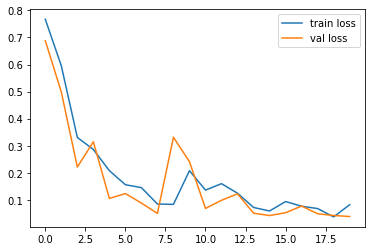

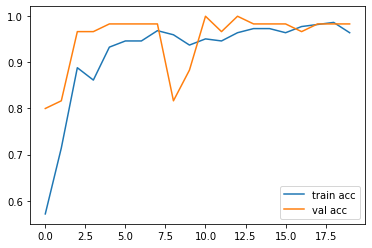

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
model.save('covid.h5')


In [14]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 17.3MB/s 
     |████████████████████████████████| 15.3MB 197kB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is inco

In [6]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img,dtype='double')
    
    x=x/255
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)

    preds = model.predict_classes(x)
    
    if preds==1:
        return "Negative"
    elif preds==0:
        return "Positive"

In [8]:

covid = load_model('covid.h5')

path = '/content/CovidDataset/Train/Normal/IM-0172-0001.jpeg'
model_predict(path,covid)

'Negative'

In [6]:
!pip install anvil-uplink

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45230 sha256=faa7d7bb03704263f570fa9363e6ec1688480d829fa75acc2f02a12e957e0c0e
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [1]:
import anvil.server

In [2]:
anvil.server.connect('KFYJTBC64TXZ4KPVU3N5MFIV-2EQLS4TJP7GKGA5X')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [9]:
@anvil.server.callable
def Covid_detection(url):
  import urllib.request
  urllib.request.urlretrieve(url, '1.jpg')
  return model_predict('/content/1.jpg', covid)

In [ ]:
anvil.server.wait_forever()